In [1]:
#Trial data loading and handling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import us
from datetime import datetime
from pytz import timezone
import pytz
import time

def get_merged_csv(flist, **kwargs):
    return pd.concat([pd.read_csv(f, **kwargs) for f in flist], ignore_index=True)

path = '/Users/cuthlo/Documents/git/springboard/capstone_project1/data/'
fmask = os.path.join(path, 'On_Time_On_Time_Performance_*.csv')

#data = get_merged_csv(glob.glob(fmask), index_col=None)

data = pd.read_csv('data/On_Time_On_Time_Performance_2017_7.csv')

print(data.head(20))
print(data.tail(20))

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (48,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


    Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0   2017        3      7           1          6  2017-07-01            WN   
1   2017        3      7           1          6  2017-07-01            WN   
2   2017        3      7           1          6  2017-07-01            WN   
3   2017        3      7           1          6  2017-07-01            WN   
4   2017        3      7           1          6  2017-07-01            WN   
5   2017        3      7           1          6  2017-07-01            WN   
6   2017        3      7           1          6  2017-07-01            WN   
7   2017        3      7           1          6  2017-07-01            WN   
8   2017        3      7           1          6  2017-07-01            WN   
9   2017        3      7           1          6  2017-07-01            WN   
10  2017        3      7           1          6  2017-07-01            WN   
11  2017        3      7           1          6  2017-07-01            WN   

In [2]:
data.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,AirlineID,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
count,509070.0,509070.0,509070.0,509070.000000,509070.000000,509070.000000,509070.000000,509070.000000,5.090700e+05,509070.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2017.0,3.0,7.0,16.244133,4.022129,19899.979908,2148.194013,12707.757676,1.270779e+06,31731.585411,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,0.0,0.0,8.832992,2.068148,378.417472,1705.696477,1534.308483,1.534306e+05,1284.698236,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2017.0,3.0,7.0,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2017.0,3.0,7.0,9.000000,2.000000,19790.000000,729.000000,11292.000000,1.129202e+06,30647.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2017.0,3.0,7.0,16.000000,4.000000,19805.000000,1728.000000,12892.000000,1.289205e+06,31453.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2017.0,3.0,7.0,24.000000,6.000000,20304.000000,3111.000000,14057.000000,1.405702e+06,32467.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2017.0,3.0,7.0,31.000000,7.000000,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(509070, 110)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509070 entries, 0 to 509069
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 427.2+ MB


In [5]:
df_trim = data.iloc[:,:63]
df_trim.shape

(509070, 63)

In [6]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509070 entries, 0 to 509069
Data columns (total 63 columns):
Year                    509070 non-null int64
Quarter                 509070 non-null int64
Month                   509070 non-null int64
DayofMonth              509070 non-null int64
DayOfWeek               509070 non-null int64
FlightDate              509070 non-null object
UniqueCarrier           509070 non-null object
AirlineID               509070 non-null int64
Carrier                 509070 non-null object
TailNum                 508583 non-null object
FlightNum               509070 non-null int64
OriginAirportID         509070 non-null int64
OriginAirportSeqID      509070 non-null int64
OriginCityMarketID      509070 non-null int64
Origin                  509070 non-null object
OriginCityName          509070 non-null object
OriginState             509070 non-null object
OriginStateFips         509070 non-null int64
OriginStateName         509070 non-null object
OriginW

In [7]:
table = pd.pivot_table(data, values=['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], index=['Year','Month'], aggfunc=np.mean)
print(table)

            CarrierDelay  LateAircraftDelay   NASDelay  SecurityDelay  \
Year Month                                                              
2017 7         20.018559          27.856715  16.498824       0.088562   

            WeatherDelay  
Year Month                
2017 7          3.251369  


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


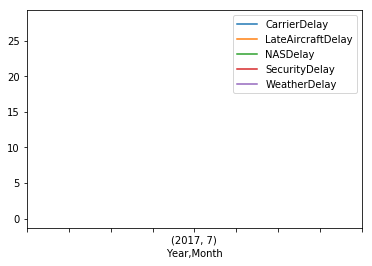

In [8]:
plt.figure()
table.plot()
plt.show()

In [9]:
df_trim.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'Carrier', 'TailNum', 'FlightNum',
       'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID',
       'Dest', 'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 'Flights', 'Distance', 'DistanceGroup',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay',

In [10]:
print("number of origin airports in the dataset: ", len(set(df_trim.Origin)))
print("number of destination airports in the dataset: ", len(set(df_trim.Dest)))

number of origin airports in the dataset:  301
number of destination airports in the dataset:  300


In [11]:
#Count no. of flights by carriers

df_trim.Carrier.value_counts(dropna=False)

WN    117975
DL     83604
AA     79403
OO     64559
UA     53569
EV     29231
B6     26436
AS     17027
NK     14212
F9      9611
HA      7308
VX      6135
Name: Carrier, dtype: int64

In [12]:
#First 20 busiest airports as origin and put into new list 'orig_airport_list

df_airport_count=df_trim.Origin.value_counts(dropna=False)
orig_airport_list = list(df_airport_count.index.values)[:20]
orig_airport_list



In [ ]:
#Select rows for those 20 airports only

df_trim = df_trim[df_trim['Origin'].isin(orig_airport_list)]

In [13]:
#First 20 busiest airports as destination

df_airport_count=df_trim.Dest.value_counts(dropna=False)
dest_airport_list = list(df_airport_count.index.values)[:20]
dest_airport_list

['LAX',
 'ORD',
 'ATL',
 'DEN',
 'SFO',
 'SEA',
 'LAS',
 'DFW',
 'BOS',
 'PHX',
 'MCO',
 'MSP',
 'EWR',
 'SAN',
 'DTW',
 'SLC',
 'JFK',
 'PHL',
 'CLT',
 'IAH']

In [14]:
#Add column IsDelay to flag whether that flight delayed or not

df_trim['IsDelay'] = np.where(df_trim['CarrierDelay'].isnull(), 0, 1)
df_trim.head()
df_trim.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,IsDelay
509065,2017,3,7,1,6,2017-07-01,WN,19393,WN,N499WN,...,762.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
509066,2017,3,7,1,6,2017-07-01,WN,19393,WN,N8306H,...,692.0,3,141.0,0.0,10.0,0.0,0.0,NaN,NaN,1
509067,2017,3,7,1,6,2017-07-01,WN,19393,WN,N272WN,...,692.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
509068,2017,3,7,1,6,2017-07-01,WN,19393,WN,N947WN,...,404.0,2,0.0,0.0,27.0,0.0,0.0,NaN,NaN,1
509069,2017,3,7,1,6,2017-07-01,WN,19393,WN,N486WN,...,404.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
df_trim['FlightDate'] = pd.to_datetime(df_trim['FlightDate'])

In [16]:
type(df_trim['FlightDate'])

pandas.core.series.Series

In [17]:
df_trim=df_trim.sort_values(by=['FlightDate'])

In [18]:
df_trim = df_trim.reset_index(drop=True)

In [19]:
df_trim[(df_trim['FlightDate'] == '2017-07-30') & (df_trim['Origin'] == 'SFO')].FlightNum.count()

521

In [20]:
#Check dep time is in '00' hours

df_trim[df_trim['CRSDepTime'] <=99].CRSDepTime

'59'

In [21]:
df_trim[df_trim['Origin'].isin(df_trim.Origin.value_counts(dropna=False).head(20).index.values)]['OriginState'].unique()

array(['GA', 'NV', 'CA', 'WA', 'UT', 'MN', 'MI', 'IL', 'CO', 'TX', 'AZ',
       'NJ', 'MD', 'FL', 'MA', 'NY', 'NC'], dtype=object)

In [ ]:
#Convert CRSDepTime to str and fill empty with '0' to make up length of 4 chars

df_trim.CRSDepTime = df_trim.CRSDepTime.apply(lambda x: str(int(x)).zfill(4))
df_trim.info()
df_trim.CRSDepTime

In [ ]:
#Find the timezone of the airport and put in new column 'OriginTimeZone'

df_trim['OriginTimeZone'] = df_trim['OriginState'].apply(lambda x: str(us.states.lookup(x).time_zones[0]))

In [22]:
#Calculate no. of delay in previous day and put in new column 'previous_date_delay'

def cal_previous_date_delay(row, thisdate, origin, ndays, dfrow):
    dateBeforeNdays = thisdate - pd.DateOffset(days=ndays)
    dfrowNdays = dfrow[(dfrow['FlightDate'] == dateBeforeNdays) & (dfrow['Origin'] == origin)]
    apt_preiviousday_no_of_delay = dfrowNdays['IsDelay'].sum()
    #print([thisdate, origin, apt_preiviousday_no_of_delay])
    return apt_preiviousday_no_of_delay

def convert_to_utc(flightdate, deptime, state, origintimezone):
    """This combine flightdate and deptime, then convert to UTC time by State"""
    hour = deptime[:2]
    minute = deptime[2:]
    
    #print(flightdate, deptime, hour, minute)
    combinedflghttime = flightdate.replace(hour=int(hour),minute=int(minute))
    #print(combinedflghttime)
    #DepTimezone = str(us.states.lookup(DepState).time_zones[0])
    local = pytz.timezone(origintimezone)
    local_dt = local.localize(combinedflghttime, is_dst=None)
    utc_dt = local_dt.astimezone(pytz.utc)
    return utc_dt    

#Create 3 new columns for matching
df_trim['AptPreviousDateDelay'] = np.nan
df_trim['AptNoOfFlight'] = np.nan
df_trim['UTCFlightDateTime'] = np.nan

for row in np.arange(len(df_trim)):
#for row in range(500):
    thisDate = df_trim.FlightDate[row]
    origin = df_trim.Origin[row]
    CRSDepTime = df_trim.CRSDepTime[row]
    DepState = df_trim.OriginState[row]
    OriginTimeZone = df_trim.OriginTimeZone[row]
    
    df_trim['AptPreviousDateDelay'][row] = cal_previous_date_delay(row, thisDate, origin, 1, df_trim)
    #print(df_trim.FlightDate[row], df_trim.Origin[row], df_trim[(df_trim['FlightDate'] == df_trim.FlightDate[row]) & (df_trim['Origin'] == df_trim.Origin[row])].FlightNum.count())
    df_trim['AptNoOfFlight'][row] = df_trim[(df_trim['FlightDate'] == df_trim.FlightDate[row]) & (df_trim['Origin'] == df_trim.Origin[row])].FlightNum.count()
    utc_str = str(convert_to_utc(thisDate, CRSDepTime, DepState, OriginTimeZone))[:13]
    #print(utc_str)
    df_trim['UTCFlightDateTime'][row] = utc_str
    if (row % 50000 == 0):
            print("Data processed: ", row, " rows")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See

Data processed:  0  rows
Data processed:  50000  rows
Data processed:  100000  rows
Data processed:  150000  rows
Data processed:  200000  rows
Data processed:  250000  rows


In [23]:
df_trim[(df_trim['FlightDate'] == df_trim.FlightDate[row]) & (df_trim['Origin'] == df_trim.Origin[row])].FlightNum.count()

442

In [24]:
#Load top 20 origin airports weather into new dataframe

print('Loading weather data of',orig_airport_list[0])
dfwx = pd.read_csv('data/weatherdata/'+orig_airport_list[0]+'_201507310000_201707310000.txt')

for airport in orig_airport_list[1:]:
    print('Loading weather data of',airport)
    dfwx = pd.concat([dfwx, pd.read_csv('data/weatherdata/'+airport+'_201507310000_201707310000.txt')])
    
dfwx['DateHr'] = dfwx.valid.str[:13]
dfwx = dfwx.reset_index()
dfwx = dfwx.drop('index', axis=1)

Loading weather data of ATL


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading weather data of ORD


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading weather data of DEN
Loading weather data of LAX


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Loading weather data of DFW
Loading weather data of SFO
Loading weather data of SEA
Loading weather data of PHX
Loading weather data of LAS
Loading weather data of MSP
Loading weather data of MCO
Loading weather data of IAH
Loading weather data of BOS
Loading weather data of DTW
Loading weather data of SLC
Loading weather data of EWR
Loading weather data of CLT
Loading weather data of BWI
Loading weather data of JFK
Loading weather data of MDW


In [25]:
type(dfwx)

pandas.core.frame.DataFrame

In [26]:
dfwx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857398 entries, 0 to 2857397
Data columns (total 25 columns):
station       object
valid         object
lon           float64
lat           float64
tmpf          object
 dwpf         object
 relh         object
 drct         object
 sknt         object
 p01i         object
 alti         object
 mslp         object
 vsby         object
 gust         object
 skyc1        object
 skyc2        object
 skyc3        object
 skyc4        object
 skyl1        object
 skyl2        object
 skyl3        object
 skyl4        object
 presentwx    object
 metar        object
DateHr        object
dtypes: float64(2), object(23)
memory usage: 545.0+ MB


In [80]:
dfwx.head(20)
dfwx_trim = dfwx[~(dfwx.tmpf == 'M')]

In [42]:
df_trim.isnull()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,IsDelay,AptPreviousDateDelay,AptNoOfFlight,UTCFlightDateTime
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,False,False,False,False


In [37]:
dfwx.index[dfwx.isnull().all(1)]

Int64Index([], dtype='int64')

In [30]:
#Check any empty fields

df_trim.index[df_trim.isnull().all(1)]

Int64Index([], dtype='int64')

In [91]:
#Merge Flight Dataset with Weather Dataset with key Origin and UTCFlightDateTime with station and DateHr

merged = pd.merge(left=df_trim, right=dfwx_trim, how='left', left_on=['Origin', 'UTCFlightDateTime'],
                   right_on=['station', "DateHr"])
merged.shape

(318408, 92)

In [93]:
merged[['FlightDate','FlightNum','Carrier','Origin','UTCFlightDateTime','DateHr','station',' metar']]

,FlightDate,FlightNum,Carrier,Origin,UTCFlightDateTime,DateHr,station,metar
0,2017-07-01,4197,WN,ATL,2017-07-01 10,2017-07-01 10,ATL,KATL 011052Z 25004KT 7SM OVC004 22/21 A3009 RM...
1,2017-07-01,4930,OO,LAS,2017-07-01 20,2017-07-01 20,LAS,KLAS 012056Z 10SM CLR 42/M10 A2977 RMK AO2 SLP...
2,2017-07-01,4931,OO,LAS,2017-07-02 00,2017-07-02 00,LAS,KLAS 020056Z 15011G21KT 10SM FEW200 42/M08 A29...
3,2017-07-01,4938,OO,LAX,2017-07-01 20,2017-07-01 20,LAX,KLAX 012053Z 26009KT 10SM SCT019 SCT025 22/16 ...
4,2017-07-01,4940,OO,SEA,2017-07-02 01,2017-07-02 01,SEA,KSEA 020153Z 00000KT 10SM CLR 22/12 A3004 RMK ...
5,2017-07-01,4941,OO,SEA,2017-07-02 04,2017-07-02 04,SEA,KSEA 020453Z 28003KT 10SM CLR 17/12 A3006 RMK ...
6,2017-07-01,4946,OO,SLC,2017-07-01 21,2017-07-01 21,SLC,KSLC 012154Z 33010G16KT 10SM FEW100 FEW220 34/...
7,2017-07-01,4959,OO,SLC,2017-07-01 17,2017-07-01 17,SLC,KSLC 011754Z 08005KT 10SM FEW110 FEW200 28/05 ...
8,2017-07-01,4960,OO,MSP,2017-07-01 14,2017-07-01 14,MSP,KMSP 011453Z 32010KT 10SM FEW150 SCT250 21/13 ...
9,2017-07-01,4965,OO,SEA,2017-07-02 02,2017-07-02 02,SEA,KSEA 020253Z 27005KT 10SM CLR 21/12 A3005 RMK ...


In [94]:
merged[merged.DateHr.isnull()]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,metar,DateHr
21094,2017,3,7,3,1,2017-07-03,B6,20409,B6,N294JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21310,2017,3,7,3,1,2017-07-03,B6,20409,B6,N947JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23194,2017,3,7,3,1,2017-07-03,B6,20409,B6,N529JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23202,2017,3,7,3,1,2017-07-03,B6,20409,B6,N178JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23493,2017,3,7,3,1,2017-07-03,B6,20409,B6,N281JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24759,2017,3,7,3,1,2017-07-03,NK,20416,NK,N516NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27990,2017,3,7,3,1,2017-07-03,NK,20416,NK,N525NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28505,2017,3,7,4,2,2017-07-04,DL,19790,DL,N302DN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29533,2017,3,7,4,2,2017-07-04,B6,20409,B6,N236JB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29875,2017,3,7,4,2,2017-07-04,WN,19393,WN,N967WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
merged[(merged['FlightDate'] == '2017-07-13') & (merged['TailNum'] == 'N849UA')]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,skyc2,skyc3,skyc4,skyl1,skyl2,skyl3,skyl4,presentwx,metar,DateHr
123049,2017,3,7,13,4,2017-07-13,UA,19977,UA,N849UA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126251,2017,3,7,13,4,2017-07-13,UA,19977,UA,N849UA,...,SCT,BKN,M,6000.00,14000.00,22000.00,M,M,KDEN 132053Z 11007G14KT 10SM SCT060 SCT140 BKN...,2017-07-13 20
126983,2017,3,7,13,4,2017-07-13,UA,19977,UA,N849UA,...,SCT,BKN,M,7000.00,15000.00,22000.00,M,M,KDEN 140153Z 19012KT 10SM FEW070 SCT150 BKN220...,2017-07-14 01
127087,2017,3,7,13,4,2017-07-13,UA,19977,UA,N849UA,...,SCT,M,M,14000.00,22000.00,M,M,M,KDEN 131453Z 24004KT 10SM FEW140 SCT220 21/13 ...,2017-07-13 14


In [96]:
#Remove rows with 'DateHr' are NaN

merged_trim = merged[~(merged.DateHr.isnull())]
merged_trim.shape

(306279, 92)

In [97]:
#Export to CSV file
merged_trim.to_csv('merged_trim_dataset.csv')

(3539421, 92)